In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [35]:
iris = load_iris()
data = pd.read_csv("../Data_Analytics_With_Python/ProjectonDecisionTree/iris.csv")
#print(X)

In [36]:
X = data.drop("species", axis=1)

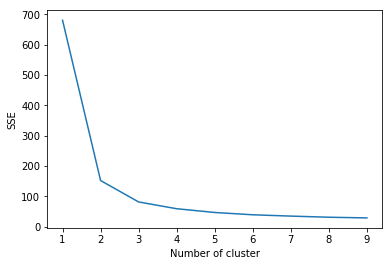

In [40]:
sse = {}
for k in range(1, 10):
    km = KMeans(n_clusters=k, max_iter=1000)
    km.fit(X)
    X["clusters"] = km.labels_
    #print(data["clusters"])
    sse[k] = km.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

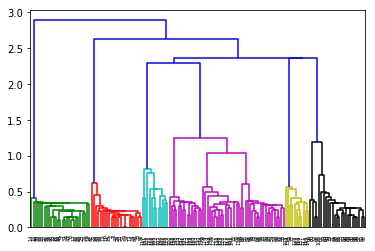

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)

plt.figure()
dn = dendrogram(Z)
plt.show()

In [2]:
A = pd.read_csv("HR_Analytics.csv")

In [3]:
y = A["is_promoted"]

In [4]:
X = A.drop(["is_promoted","employee_id"],axis=1)

In [5]:
cat_columns = ["department", "region", "education", "gender", "recruitment_channel"]

In [6]:
X_cont = X.drop(cat_columns, axis=1)
X_cont = X_cont.fillna(0)

In [7]:
X_cat = X[cat_columns]

In [8]:
X_cat_coded = pd.get_dummies(X_cat)

In [9]:
X_final = pd.concat([X_cont, X_cat_coded],axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.30)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
%%time
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train) 

Wall time: 706 ms


In [13]:
%%time
neigh.score(x_test, y_test)

Wall time: 9.6 s


0.9213038983153926

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=10)

In [16]:
x_final_pca = pca.fit_transform(X_final)

In [17]:
x_final_pca.shape

(54808, 10)

In [18]:
sum(pca.explained_variance_ratio_)

0.9946538848881732

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_final_pca, y, test_size = 0.30)

In [20]:
%%time
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train) 

Wall time: 197 ms


In [21]:
%%time
neigh.score(x_test, y_test)

Wall time: 2.15 s


0.9218512436903241

## Anomaly Detection

In [412]:
mu = 10
sigma = 3
data_points = np.random.normal(mu, sigma, 1000)

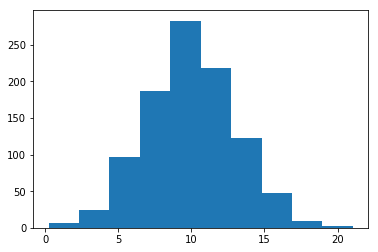

In [413]:
plt.hist(data_points)
plt.show()

In [414]:
import scipy.stats

In [415]:
dist = scipy.stats.norm

In [416]:
parameters = dist.fit(data_points)

In [417]:
parameters

(9.983708187173008, 3.062042421834169)

In [420]:
np.std(data_points)

3.062042421834169

In [421]:
dist.pdf(10, parameters[0], parameters[1])

0.13028448948770036

In [422]:
def check_anomaly(x, epsilon, mu, sigma):
    observed_prob = dist.pdf(x,mu, sigma)
    print (observed_prob)
    if observed_prob < epsilon:
        return "NOT OK"
    else:
        return "OK"

In [423]:
check_anomaly(20, 0.03, parameters[0], parameters[1])

0.0006185601011807398


'NOT OK'

In [424]:
mu_1 = 100
sigma_1 = 10
X1 = np.random.normal(mu_1, sigma_1, 5000)

mu_2 = 50
sigma_2 = 12
X2 = np.random.normal(mu_2, sigma_2, 5000)

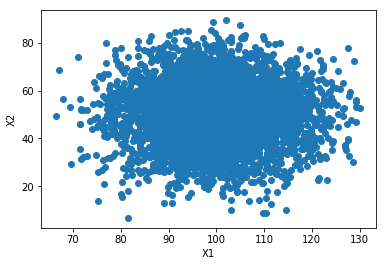

In [425]:
plt.scatter(X1, X2)
#plt.axis('equal')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [426]:
parameters_1 = dist.fit(X1)
parameters_2 = dist.fit(X2)

In [427]:
parameters_1

(100.14318754682782, 9.880950026665115)

In [428]:
parameters_2

(50.03171091811257, 12.097793605819463)

In [429]:
def check_anomaly(x1,x2, epsilon, parameters_1, parameters_2):
    p1 = dist.pdf(x1, parameters_1[0], parameters_1[1])
    p2 = dist.pdf(x2, parameters_2[0], parameters_2[1])
    observed_prob = p1*p2
    print (observed_prob)
    if observed_prob < epsilon:
        return "NOT OK"
    else:
        return "OK"

In [430]:
check_anomaly(90, 80, 0.00003, parameters_1, parameters_2 )

3.655890227336495e-05


'OK'

In [431]:
check_anomaly(140,20, 0.00003,parameters_1, parameters_2 )

1.7907040805376326e-08


'NOT OK'

In [432]:
np.random.seed(10)

In [433]:
mean = [100, 50]
cov = [[10, 8], [8, 12]]  #diagonal covariance   # [[2, 5], [5, 10]]

In [434]:
data_points = np.random.multivariate_normal(mean, cov, 5000)

In [435]:
X1 = data_points[:,0]
X2 = data_points[:,1]

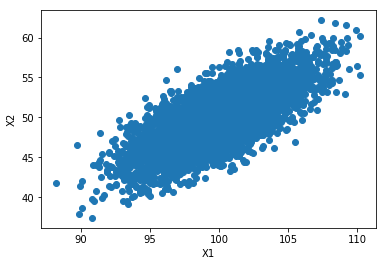

In [436]:
plt.scatter(X1, X2)
#plt.axis('equal')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [437]:
dist_2D = scipy.stats.multivariate_normal

In [438]:
mean = np.mean(data_points, axis=0)
mean

array([99.97106146, 49.96809985])

In [439]:
cov = np.cov(data_points, rowvar=0)
cov

array([[ 9.93768118,  8.06402393],
       [ 8.06402393, 11.94883164]])

In [404]:
# dist_2D.pdf([90, 80],mean,cov)

2.358797049001541e-62

In [440]:
def check_anomaly(x, epsilon, mean, cov):
    observed_prob = dist_2D.pdf(x,mean, cov)
    print (observed_prob)
    if observed_prob < epsilon:
        return "NOT OK"
    else:
        "OK"

In [441]:
check_anomaly([90,80], 0.00003, mean, cov)

5.987608129576377e-63


'NOT OK'